In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install duckduckgo_search

Using ddg_images for 'grizzly bear'
Failed to download http://bearlegend.com/wp-content/uploads/2012/04/2390661788_951acb14b8_o.jpg: 404 Client Error: Not Found for url: http://bearlegend.com/wp-content/uploads/2012/04/2390661788_951acb14b8_o.jpg
Failed to download https://rare-gallery.com/uploads/posts/4600400-bear-grizzly-bear-grizzly-brown-animal-nature.jpg: 403 Client Error: Forbidden for url: https://rare-gallery.com/uploads/posts/4600400-bear-grizzly-bear-grizzly-brown-animal-nature.jpg
Failed to download https://wallpapercrafter.com/desktop1/670137-Grizzly-Bear-Drip-grass-field-daytime-Denali.jpg: 403 Client Error: Forbidden for url: https://wallpapercrafter.com/desktop1/670137-Grizzly-Bear-Drip-grass-field-daytime-Denali.jpg
Failed to download https://rare-gallery.com/uploads/posts/4533550-bears-sadness-grizzly-bear-brown-bear-grizzly-bears-animals.jpg: 403 Client Error: Forbidden for url: https://rare-gallery.com/uploads/posts/4533550-bears-sadness-grizzly-bear-brown-bear-griz

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 155MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,2.204932,5.568190,0.647059,00:34


epoch,train_loss,valid_loss,error_rate,time
0,1.773717,3.731443,0.529412,00:43
1,1.507048,1.054038,0.352941,00:42
2,1.113993,0.171126,0.058824,00:42


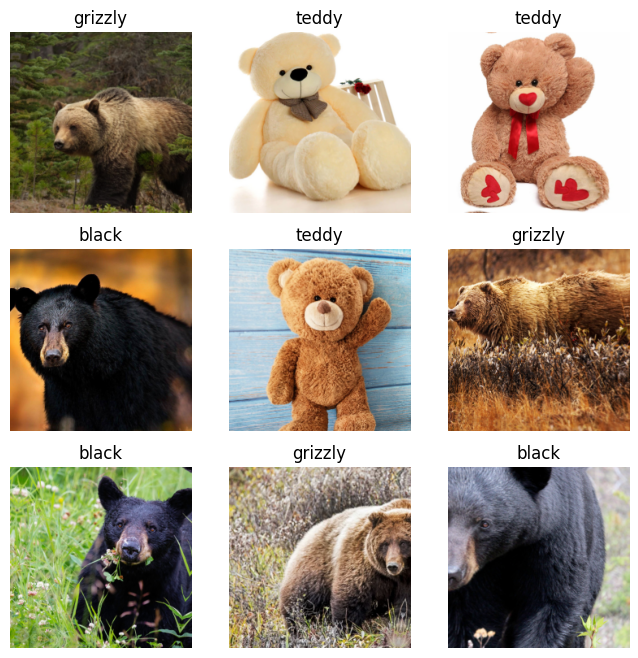

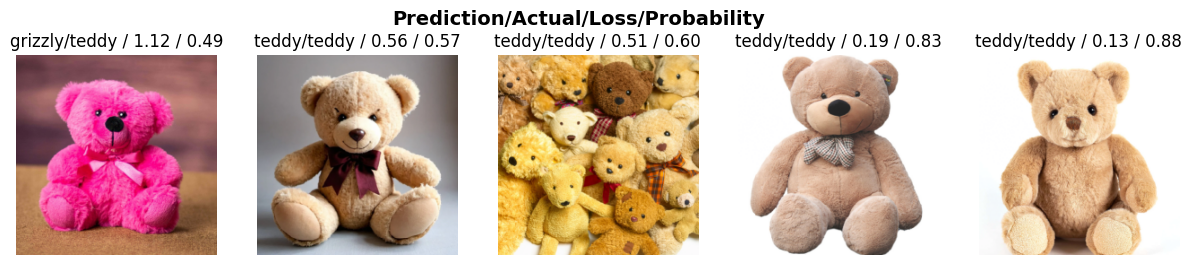

In [19]:
from pathlib import Path
from fastai.vision.all import *
from fastdownload import download_url
from fastcore.foundation import L
from duckduckgo_search import DDGS  # ✅ 用函数导入
import requests
import time

def search_images(term, max_images=30):
    print(f"Using ddg_images for '{term}'")
    time.sleep(2)
    return L(DDGS().images(term, max_results=max_images)).itemgot('image')

def download_image(url, dest):
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        r = requests.get(url, headers=headers, timeout=10)
        r.raise_for_status()
        with open(dest, 'wb') as f:
            f.write(r.content)
    except Exception as e:
        print(f"Failed to download {url}: {e}")


def download_bear_images(bear_type):
    path = Path(f'bears/{bear_type}')
    path.mkdir(parents=True, exist_ok=True)
    urls = search_images(f'{bear_type} bear', max_images=30)
    for i, url in enumerate(urls):
        download_image(url, path/f"{i}.jpg")
    print(f"Downloaded {len(urls)} images for {bear_type}")

for bear in ['grizzly', 'black', 'teddy']:
    download_bear_images(bear)

bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.2),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

dls = bears.dataloaders('bears')
dls.show_batch(max_n=9, figsize=(8,8))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5, nrows=1)
